In [50]:
def features(data):
    data = data[['weaponsAcquired','damageDealt','walkDistance','boosts','winPlacePerc']]
    data = data.dropna()
    scaling = RobustScaler()
    data = scaling.fit_transform(data)
    #data = data[['damageDealt','Distance','winPlacePerc']]
    return data

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
pd.options.display.max_columns = None

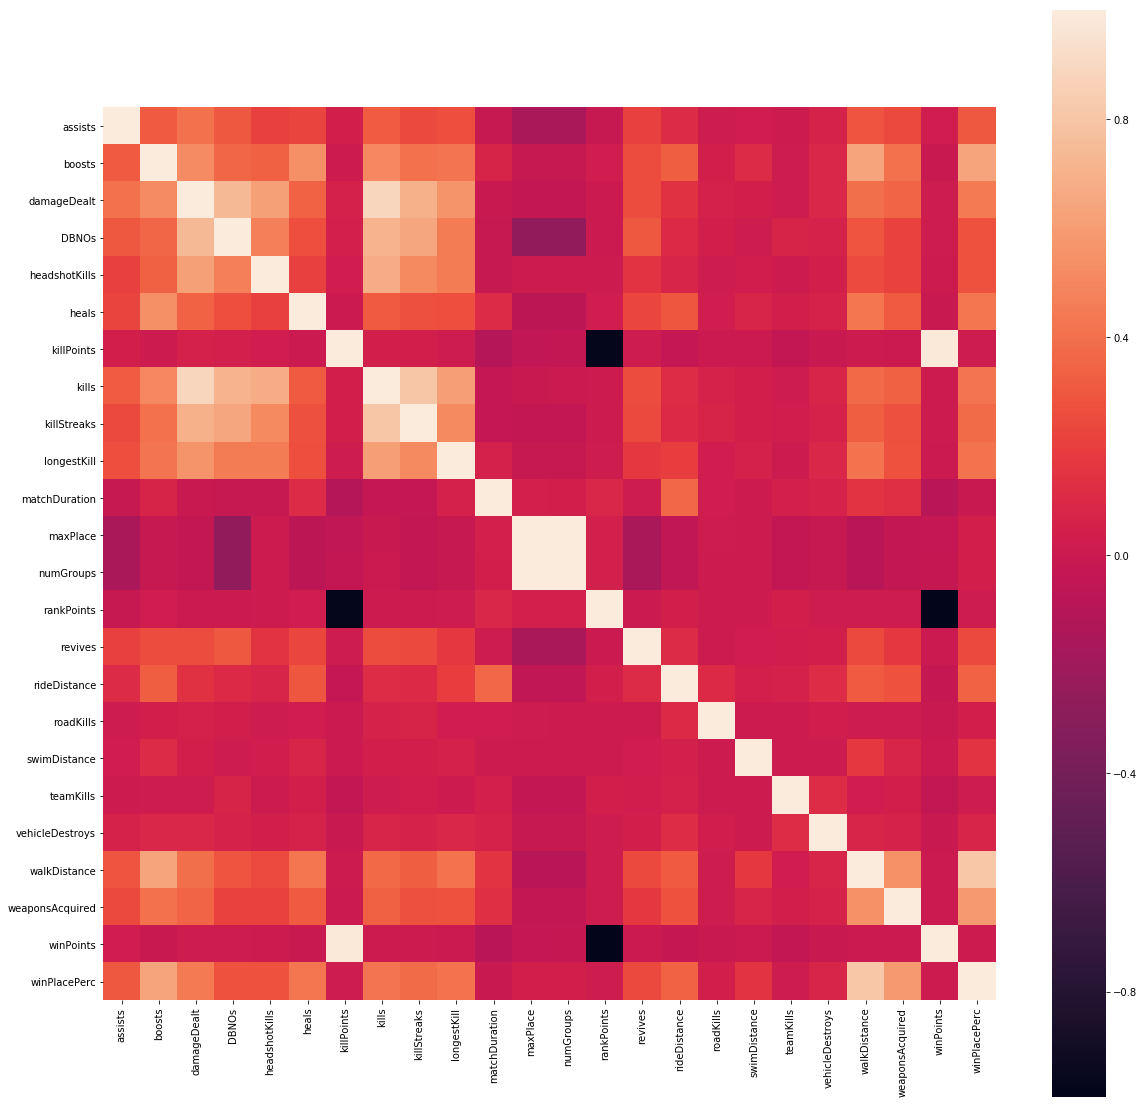

In [44]:
data = pd.read_csv('train_V2.csv')
data.pop('Id')
data.pop('groupId')
data.pop('matchId')
data.pop('killPlace') # Remove this as its basically the opposite of killplaceperc
cor = data.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(20,20))
sns.heatmap(cor, square = True) #Plot the correlation as heat map

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


<BarContainer object of 24 artists>

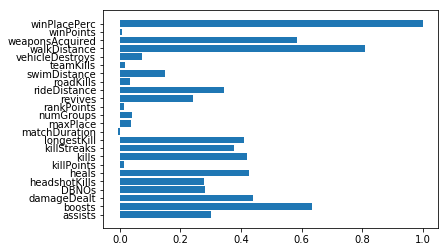

In [45]:
data.pop('matchType')
print(list(data))
plt.barh(y=list(data),width=cor["winPlacePerc"])

In [51]:
#data = data.sample(10000)
data = features(data)

In [ ]:
scores = []
for i in range(1,20):
    km_cluster = KMeans(n_clusters=i)
    km_cluster_predictions = km_cluster.fit_predict(X=data)
    score = km_cluster.score(data)
    scores.append(score)
    print("Score with {} clusters = {}".format(i,score))


-13319591.589595105
Score with 1 clusters = -13319591.589595105
-7788653.615519808
Score with 2 clusters = -7788653.615519808
-6013461.64647888
Score with 3 clusters = -6013461.64647888
-5232890.357570892
Score with 4 clusters = -5232890.357570892
-4731295.041301423
Score with 5 clusters = -4731295.041301423


In [ ]:
plt.scatter(x=range(1,20),y=scores)

In [ ]:
final_km_cluster = KMeans(n_clusters=i)
final_km_cluster_predictions = final_km_cluster.fit_predict(X=data)
plt.hist(final_km_cluster_predictions)

In [ ]:
data['Groups'] = final_km_cluster_predictions[0]


In [ ]:
group_stats = data.groupby(['Groups']).mean()
print(group_stats)